In [1]:
import pandas as pd
import seaborn as sns
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Installing mpld3 to perform saving plots in html, json formats
!pip install mpld3

In [3]:
import mpld3

Reading and loading the dataset from file

In [ ]:
dataframe = pd.read_csv('./data/data.csv')

In [30]:
dataframe.shape

(12000, 16)

Column names

In [31]:
dataframe.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [32]:
dataframe.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [33]:
dataframe.tail(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11998,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,27795
11999,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


Exploring the columns with mean, median, standard deviation, Quartile ranges and their values

In [34]:
dataframe.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,12000.000000,11931.000000,11970.000000,11994.000000,12000.000000,12000.000000,12000.000000,1.200000e+04
mean,2010.366417,249.212304,5.626149,3.433967,26.652583,19.731667,1562.599750,4.047974e+04
std,7.610080,108.942442,1.776181,0.882499,8.843787,8.958944,1444.032657,5.992542e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.217625e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Columns Datatypes

In [8]:
# Datatypes of attributes
dataframe.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [9]:
# Profiling the entire dataset to see relationships with columns, One of the methods to do EDA
import numpy as np
import pandas_profiling as pp
profile = pp.ProfileReport(dataframe)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Check for missing values

In [9]:
# Checking for null values
dataframe.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Calculating Central Tendency and Dispersion

In [158]:
# Mean of attributes
dataframe.mean()

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\3245295385.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.mean()


Year                 2010.366417
Engine HP             249.212304
Engine Cylinders        5.626149
Number of Doors         3.433967
highway MPG            26.652583
city mpg               19.731667
Popularity           1562.599750
MSRP                40479.736833
dtype: float64

In [159]:
# Mean along the rows
dataframe.mean(axis=1)

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\828619721.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.mean(axis=1)


0        6556.250
1        5866.500
2        5329.125
3        4457.625
4        5088.875
           ...   
11995    3221.375
11996    3621.375
11997    4285.125
11998    3884.500
11999    6685.750
Length: 12000, dtype: float64

In [160]:
# Median of attributes
dataframe.median()

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\2007773594.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.median()


Year                 2015.0
Engine HP             227.0
Engine Cylinders        6.0
Number of Doors         4.0
highway MPG            26.0
city mpg               18.0
Popularity           1385.0
MSRP                29990.0
dtype: float64

In [161]:
# Median along the rows
dataframe.median(axis=1)

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\947058412.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.median(axis=1)


0        180.5
1        164.0
2        164.0
3        129.0
4        129.0
         ...  
11995    110.0
11996    110.0
11997    161.5
11998    110.0
11999    113.5
Length: 12000, dtype: float64

In [162]:
# Standard deviation of attributes
dataframe.std()

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\3401367348.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.std()


Year                    7.610080
Engine HP             108.942442
Engine Cylinders        1.776181
Number of Doors         0.882499
highway MPG             8.843787
city mpg                8.958944
Popularity           1444.032657
MSRP                59925.421555
dtype: float64

In [163]:
# Standard deviation Along rows
dataframe.std(axis=1)

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\4172479084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.std(axis=1)


0        16053.728501
1        14124.782092
2        12612.897678
3        10196.444477
4        11967.277020
             ...     
11995     7818.587887
11996     8945.800418
11997    10777.584363
11998     9687.823536
11999    17886.295622
Length: 12000, dtype: float64

In [165]:
# Calculating the variance
print(dataframe.var())

Year                5.791331e+01
Engine HP           1.186846e+04
Engine Cylinders    3.154818e+00
Number of Doors     7.788045e-01
highway MPG         7.821257e+01
city mpg            8.026269e+01
Popularity          2.085230e+06
MSRP                3.591056e+09
dtype: float64


C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\3948014197.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(dataframe.var())


Check for Duplicates and eliminating the same

In [35]:
# Checking for duplicates
bool_series = dataframe.duplicated()
bool_series.value_counts()

False    11199
True       801
dtype: int64

In [36]:
dataframe.drop_duplicates()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


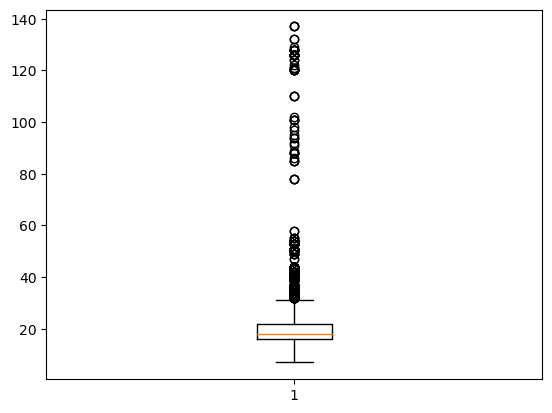

In [15]:
import matplotlib.pyplot as plt
plt.boxplot(dataframe['city mpg'])
plt.show()

In [37]:
# Separating Numeric data from the dataframe
numeric_data = dataframe.select_dtypes(include=[np.number])

In [38]:
numeric_data.dtypes

Year                  int64
Engine HP           float64
Engine Cylinders    float64
Number of Doors     float64
highway MPG           int64
city mpg              int64
Popularity            int64
MSRP                  int64
dtype: object

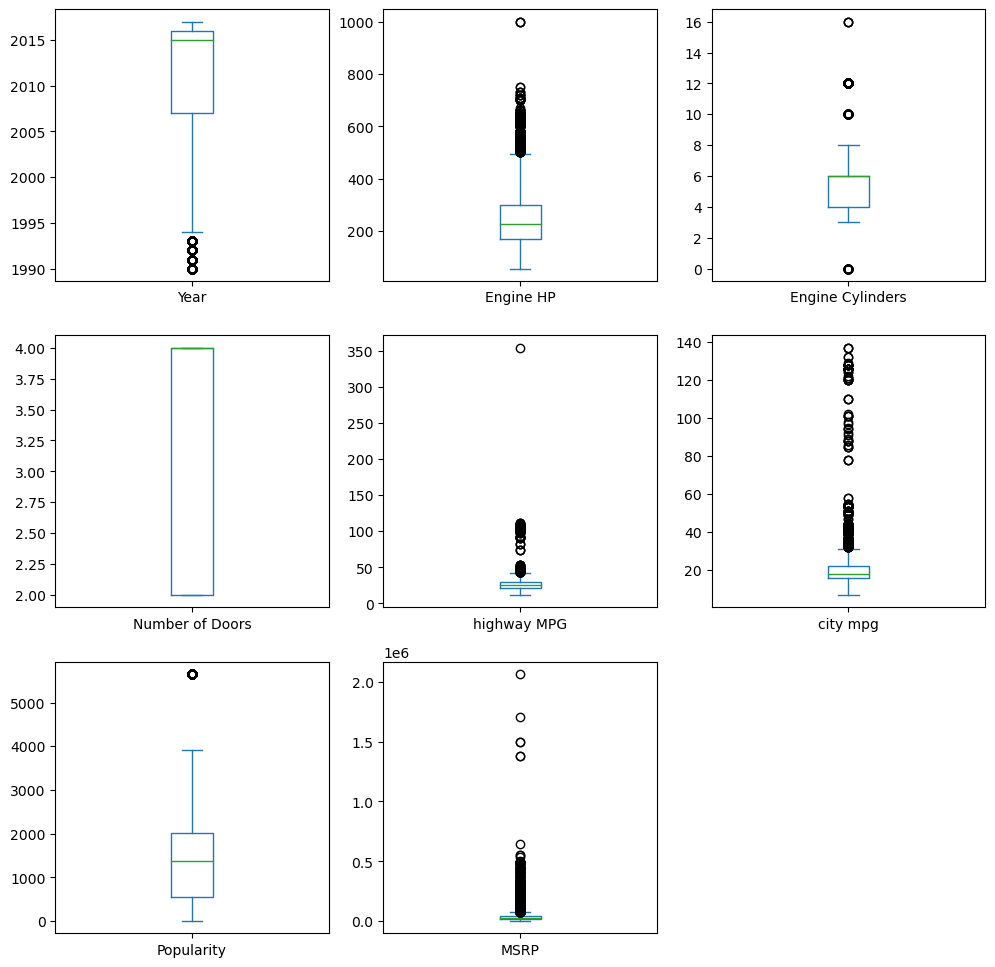

In [134]:
#Boxplot  of numeric data
numeric_data.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)
mpld3.save_html(fig,"figout_1.html")
mpld3.save_json(fig,"figout_1.json")

html = mpld3.fig_to_html(fig,"figout_1.json")
print (html)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Engine HP'}>,
        <AxesSubplot:title={'center':'Engine Cylinders'}>],
       [<AxesSubplot:title={'center':'Number of Doors'}>,
        <AxesSubplot:title={'center':'highway MPG'}>,
        <AxesSubplot:title={'center':'city mpg'}>],
       [<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'MSRP'}>, <AxesSubplot:>]],
      dtype=object)

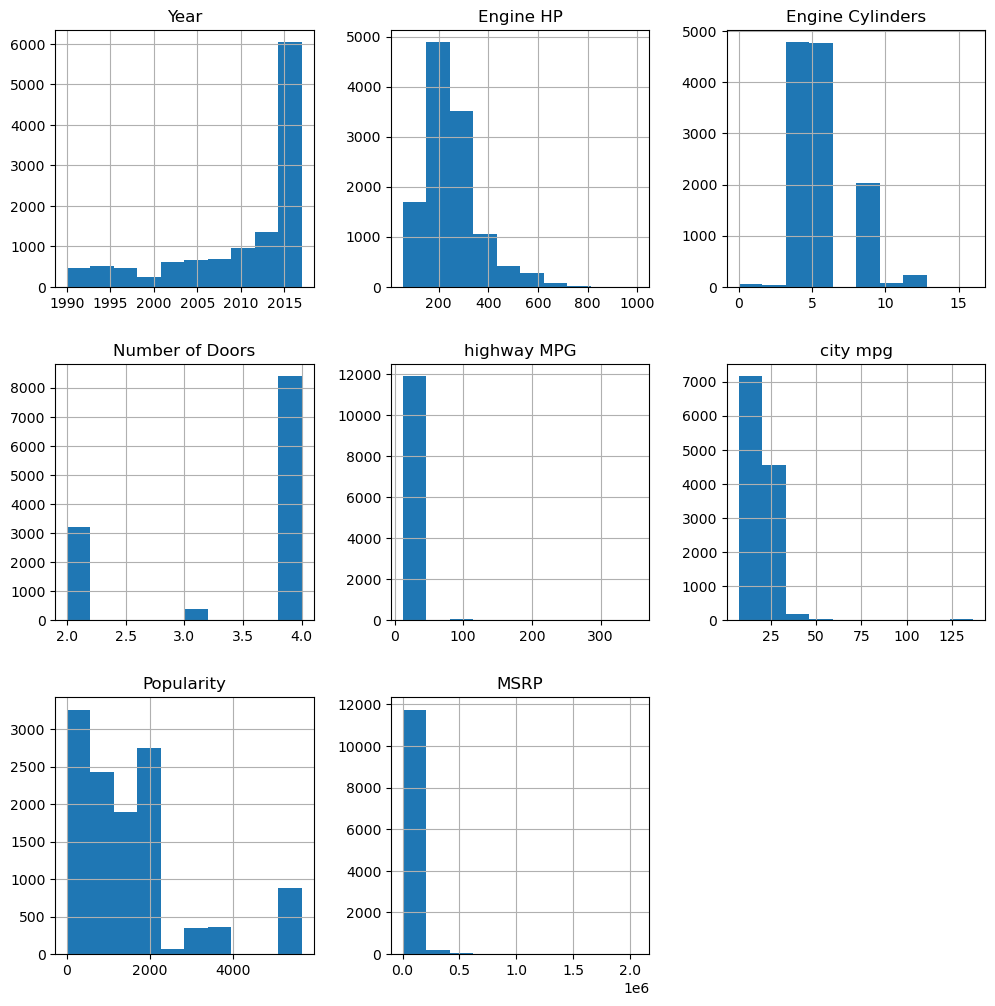

In [40]:
#Histogram plot of numeric data
numeric_data.hist(figsize=(12,12),layout=(3,3),sharex=False)

In [166]:
#Analysing the corelation of numeric values
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')
plt.savefig('Corelation.jpg')

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.352626,-0.042087,0.255172,0.260254,0.199134,0.070229,0.228872
Engine HP,0.352626,1.000000,0.779277,-0.104283,-0.405275,-0.438410,0.037712,0.662145
Engine Cylinders,-0.042087,0.779277,1.000000,-0.139109,-0.621844,-0.600738,0.041149,0.530844
Number of Doors,0.255172,-0.104283,-0.139109,1.000000,0.115803,0.119302,-0.054588,-0.126986
highway MPG,0.260254,-0.405275,-0.621844,0.115803,1.000000,0.886471,-0.020573,-0.159522
city mpg,0.199134,-0.438410,-0.600738,0.119302,0.886471,1.000000,-0.003734,-0.157155
Popularity,0.070229,0.037712,0.041149,-0.054588,-0.020573,-0.003734,1.000000,-0.049073
MSRP,0.228872,0.662145,0.530844,-0.126986,-0.159522,-0.157155,-0.049073,1.000000


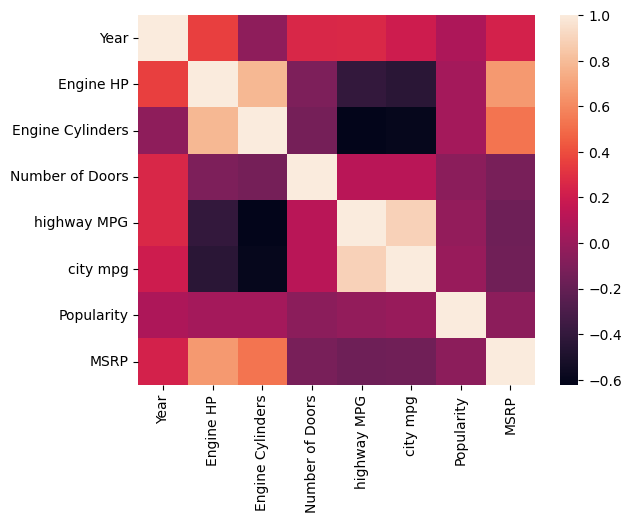

In [169]:
#Heatmap of numeric data
import seaborn as sns
sns.heatmap(numeric_data.corr())
plt.savefig('Heatmap.jpg')
mpld3.save_html(fig,"figout.html")
mpld3.save_json(fig,"figout.json")

html = mpld3.fig_to_html(fig,"figout.json")
print (html)

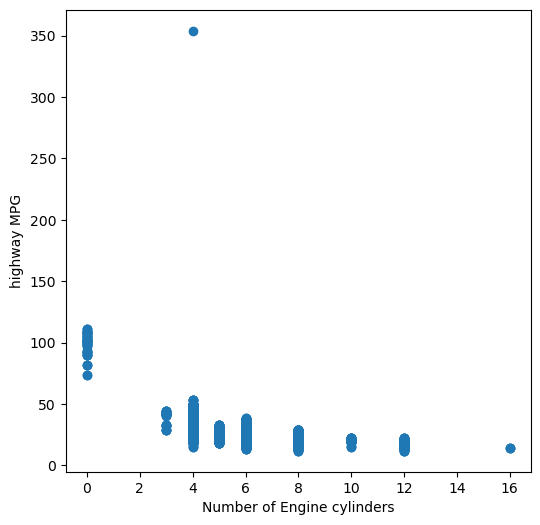

In [43]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(dataframe['Engine Cylinders'], dataframe['highway MPG'])
ax.set_ylabel('highway MPG')
ax.set_xlabel('Number of Engine cylinders')
plt.show()

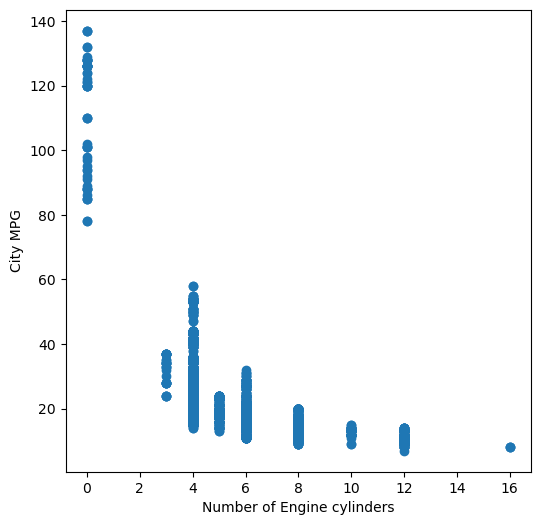

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(dataframe['Engine Cylinders'], dataframe['city mpg'])
ax.set_ylabel('City MPG')
ax.set_xlabel('Number of Engine cylinders')
plt.show()

# OUTLIERS AND NOISE DETECTION

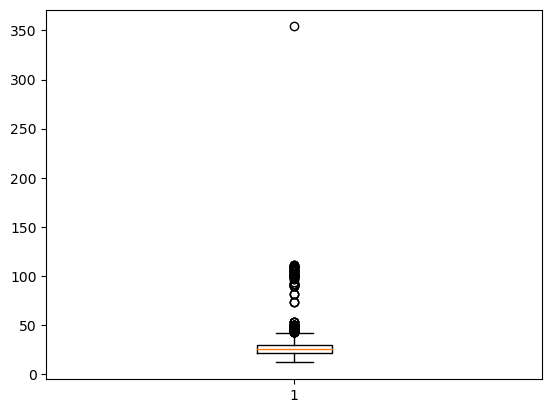

In [45]:
# Engine HP and Engine Cylinders seems to have outliers (but are not noises)
plt.boxplot(dataframe['highway MPG'])
plt.show()
#highway MPG has an outlier but it is noise since it is impractical to have such large mpg 

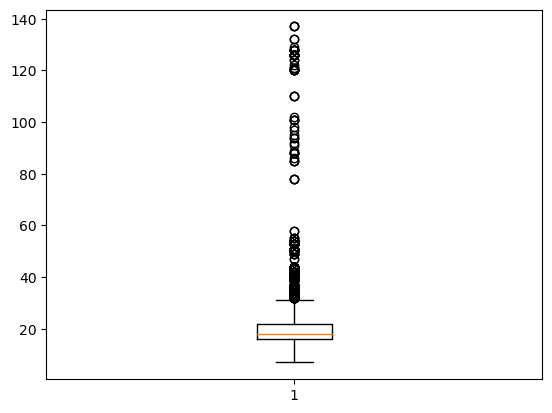

In [106]:
# city mpg has ouliers and noise (here values above 60 can be considered as noise )
plt.boxplot(dataframe['city mpg'])
plt.show()

In [46]:
dataframe[dataframe['city mpg']>60]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170
9870,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25560
9871,Chevrolet,Spark EV,2016,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25510


In [47]:
#Unique values of column Engine Fuel Type
dataframe['Engine Fuel Type'].value_counts()

regular unleaded                                7199
premium unleaded (required)                     2035
premium unleaded (recommended)                  1535
flex-fuel (unleaded/E85)                         920
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [48]:
non_electric_cars = dataframe[dataframe['Engine Fuel Type'] != 'electric']

In [49]:
non_electric_cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,22490
11996,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,25690
11997,Chrysler,200,2017,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,28,18,1013,30900
11998,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,27795


In [50]:
non_electric_cars['Engine Fuel Type'].value_counts()

regular unleaded                                7199
premium unleaded (required)                     2035
premium unleaded (recommended)                  1535
flex-fuel (unleaded/E85)                         920
diesel                                           154
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

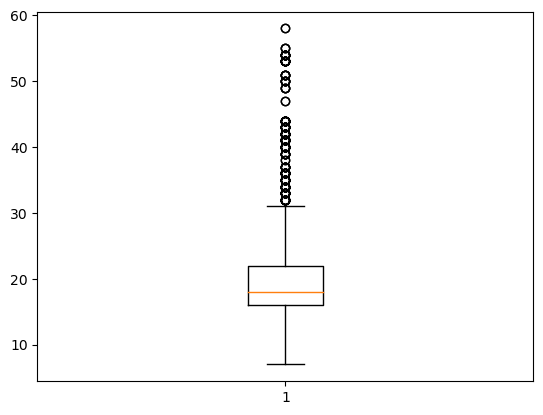

In [112]:
plt.boxplot(non_electric_cars['city mpg'])
plt.show()

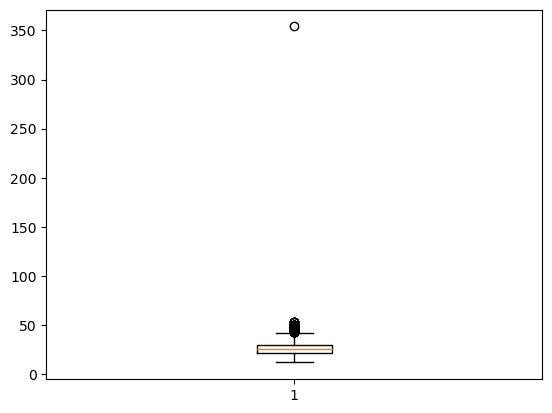

In [113]:
plt.boxplot(non_electric_cars['highway MPG'])
plt.show()

In [51]:
non_electric_cars[non_electric_cars['highway MPG']>50]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600
7676,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,55,2031,27100
7677,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,55,2031,33100
7678,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,55,2031,28800
7701,Toyota,Prius,2016,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,58,2031,24700
7708,Toyota,Prius,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,58,2031,25165


In [52]:
dataframe[dataframe['highway MPG']>50]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170
9870,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25560
9871,Chevrolet,Spark EV,2016,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25510


In [53]:
# Rmoving the noise (column AudiA6 a non electric car with 354 highwayMPG is a noise )
dataframe_removednoise = dataframe.drop(dataframe.index[1119])

In [54]:
dataframe_removednoise[dataframe_removednoise['highway MPG']>50]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170
9870,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25560
9871,Chevrolet,Spark EV,2016,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25510


In [55]:
dataframe_removednoise.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [56]:
dataframe_removednoise.tail(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11998,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,27795
11999,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# HANDLING MISSING DATA

In [57]:
dataframe_removednoise.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [58]:
X = dataframe_removednoise[['Engine HP','Engine Cylinders','Number of Doors','Transmission Type']]

In [59]:
X_dum=pd.get_dummies(X)

In [60]:
X_dum

,Engine HP,Engine Cylinders,Number of Doors,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN
0,335.0,6.0,2.0,0,0,0,1,0
1,300.0,6.0,2.0,0,0,0,1,0
2,300.0,6.0,2.0,0,0,0,1,0
3,230.0,6.0,2.0,0,0,0,1,0
4,230.0,6.0,2.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
11995,184.0,4.0,4.0,0,1,0,0,0
11996,184.0,4.0,4.0,0,1,0,0,0
11997,295.0,6.0,4.0,0,1,0,0,0
11998,184.0,4.0,4.0,0,1,0,0,0


In [61]:
# Using K Nearest Neighbour algorithm to impute missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [62]:
# Imputing step
X_imputed = pd.DataFrame(imputer.fit_transform(X_dum), columns=X_dum.columns)
X_imputed

,Engine HP,Engine Cylinders,Number of Doors,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN
0,335.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0
1,300.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0
2,300.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0
3,230.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0
4,230.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
11994,184.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0
11995,184.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0
11996,295.0,6.0,4.0,0.0,1.0,0.0,0.0,0.0
11997,184.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0


In [63]:
#Check for Null values
X_imputed.isnull().sum()

Engine HP                             0
Engine Cylinders                      0
Number of Doors                       0
Transmission Type_AUTOMATED_MANUAL    0
Transmission Type_AUTOMATIC           0
Transmission Type_DIRECT_DRIVE        0
Transmission Type_MANUAL              0
Transmission Type_UNKNOWN             0
dtype: int64

In [64]:
# Moving the imputed attributes to main dataframe
dataframe_removednoise[['Engine HP','Engine Cylinders','Number of Doors']] = X_imputed[['Engine HP','Engine Cylinders','Number of Doors']]

In [65]:
dataframe_removednoise

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,22490
11996,Chrysler,200,2017,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,25690
11997,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,28,18,1013,30900
11998,Chrysler,200,2017,flex-fuel (unleaded/E85),300.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,27795


In [69]:
dataframe_removednoise.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [130]:
dataframe_removednoise.shape

(11999, 16)

# Missing Categorical values

In [134]:
dataframe_removednoise.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [70]:
dataframe_removednoise[dataframe_removednoise['Engine Fuel Type'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [71]:
# Dropping rows where Enginr Fuel Type value has Missing values
dataframe_removednoise = dataframe_removednoise.dropna (subset='Engine Fuel Type',how='any',axis=0)

In [72]:
dataframe_removednoise.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3739
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [73]:
# Using fillna() to fill missing values of Market category
dataframe_removednoise = dataframe_removednoise.fillna("unknown")

In [74]:
# All missing values have been handled through imputation, Omission, Analaysis
dataframe_removednoise.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Visualisation

In [144]:
import seaborn as sns

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\1310882995.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataframe_removednoise[column].dtypes == np.object:
C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\1310882995.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataframe_removednoise[column].dtypes == np.object:
C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\1310882995.py:2: DeprecationWarning: `np.object` is a deprecated alias for th

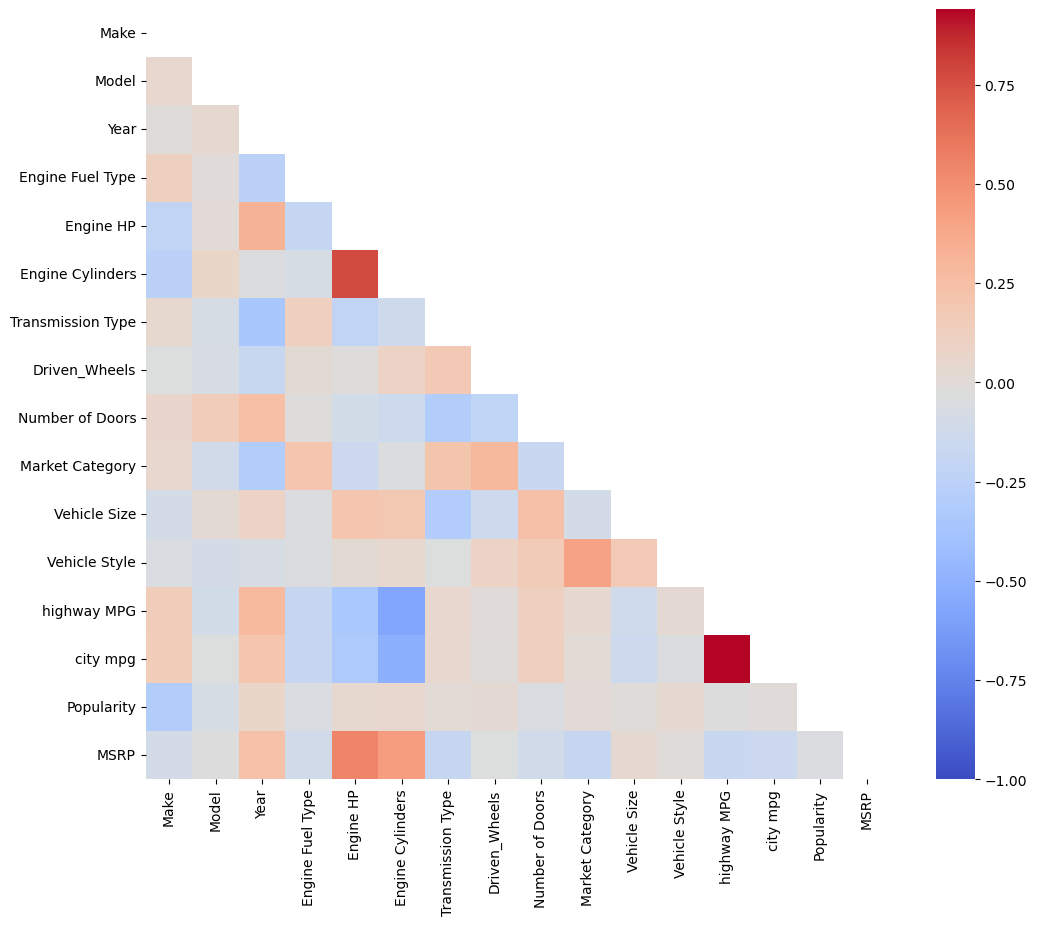

In [76]:
for column in dataframe_removednoise.columns:
    if dataframe_removednoise[column].dtypes == np.object:
        dataframe_removednoise[column] = dataframe_removednoise[column].astype('category')
        dataframe_removednoise[column] = dataframe_removednoise[column].cat.codes

#Using Pearson Correlation
cor = dataframe_removednoise.corr()

mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(cor,
            vmin=-1,
            cmap='coolwarm',
            annot=False,
            mask = mask);



In [87]:
# For interactive graphs, we import ipywidgets
import ipywidgets
import seaborn as sns

In [93]:
!pip install ipywidgets 

In [136]:
import plotly.express as px

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\2420060976.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  obj = sns.barplot(x='Year', y='Popularity',hue='Transmission Type', data=dataframe_removednoise, ci=None)


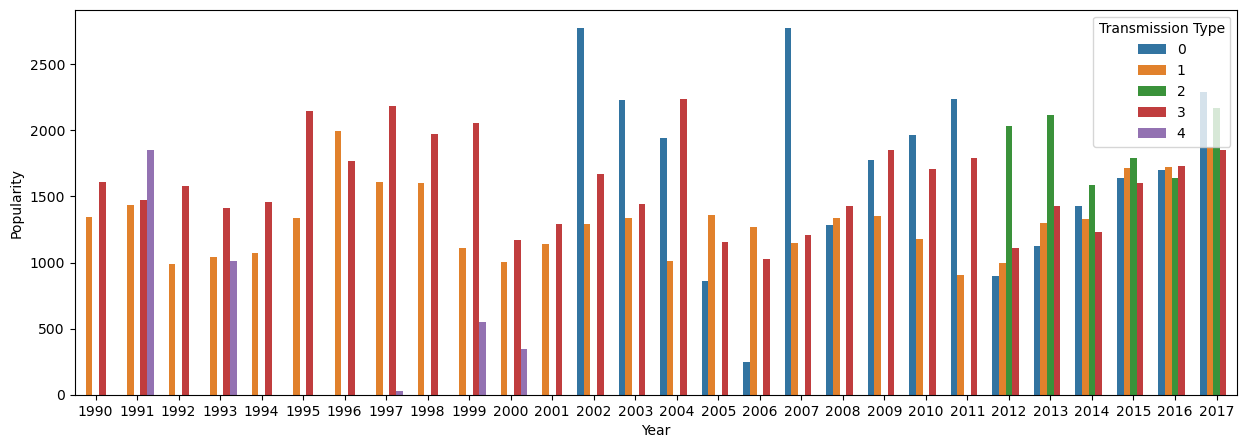

In [142]:
# Bar plot of Year vs Popularity with Transmission Type as hue
fig = plt.figure(figsize=(15,5))
obj = sns.barplot(x='Year', y='Popularity',hue='Transmission Type', data=dataframe_removednoise, ci=None)
mpld3.save_html(fig,"C:\\Users\\Abhishek MR\\Desktop\\AML2203 -python\\Visualization for AI and ML\\Assignment\\figure.html")


C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7464\3192225588.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Engine Fuel Type', y='city mpg',data=dataframe_removednoise, ci=None)


<AxesSubplot:xlabel='Engine Fuel Type', ylabel='city mpg'>

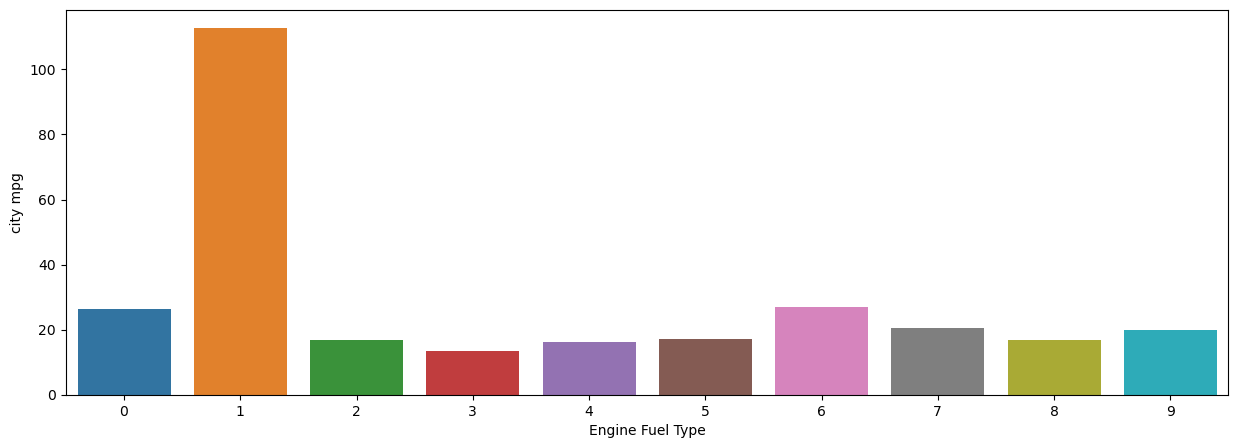

In [201]:
# Bar plot of Engine fuel type and City MPG
plt.figure(figsize=(15,5))
sns.barplot(x='Engine Fuel Type', y='city mpg',data=dataframe_removednoise, ci=None)

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\2505900743.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Engine Cylinders', y='city mpg', data=dataframe_removednoise, ci=None)


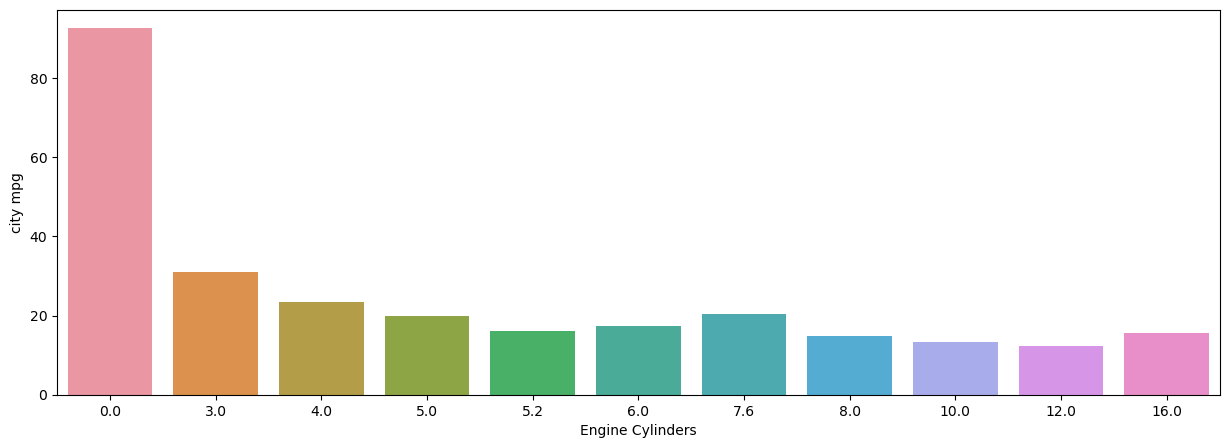

In [135]:
# Bar plot of Number of Engine cylinders and City MPG
plt.figure(figsize=(15,5))
sns.barplot(x='Engine Cylinders', y='city mpg', data=dataframe_removednoise, ci=None)
plt.savefig('saved_figure.pdf')

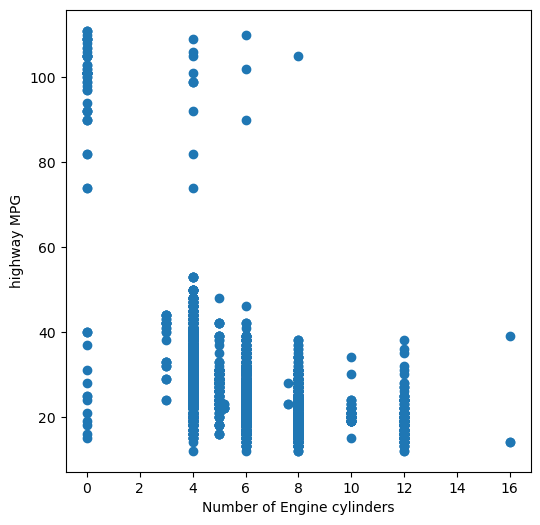

In [81]:
# Scatter plot of Highway MPG and Number of Engine cylinders
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(dataframe_removednoise['Engine Cylinders'], dataframe_removednoise['highway MPG'])
ax.set_ylabel('highway MPG')
ax.set_xlabel('Number of Engine cylinders')
plt.show()

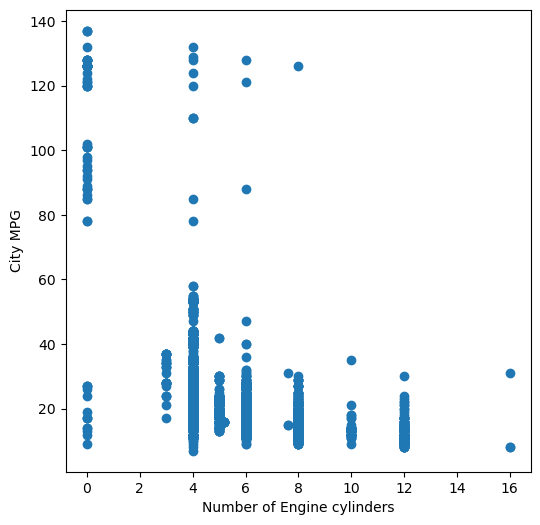

In [82]:
# Scatter plot of City MPG and Number of Engine cylinders
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(dataframe_removednoise['Engine Cylinders'], dataframe_removednoise['city mpg'])
ax.set_ylabel('City MPG')
ax.set_xlabel('Number of Engine cylinders')
plt.show()

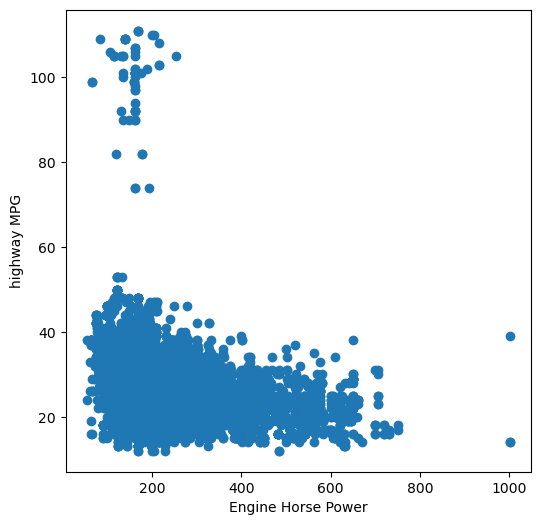

In [84]:
# Scatter plot of highway MPG vs Horse power
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(dataframe_removednoise['Engine HP'], dataframe_removednoise['highway MPG'])
ax.set_ylabel('highway MPG')
ax.set_xlabel('Engine Horse Power')
plt.show()

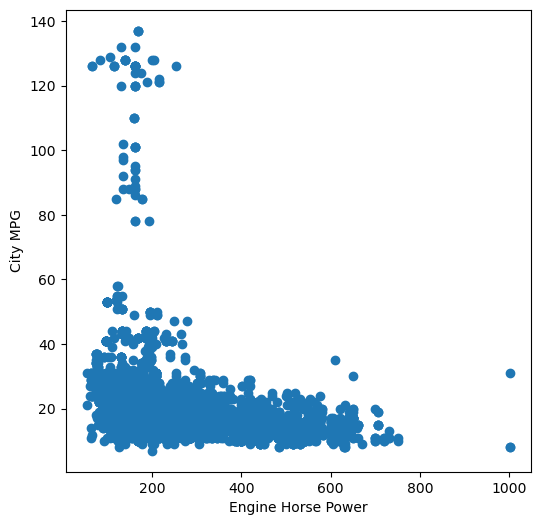

<Figure size 640x480 with 0 Axes>

In [143]:
# Scatter plot of City MPG vs Horse power
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(dataframe_removednoise['Engine HP'], dataframe_removednoise['city mpg'])
ax.set_ylabel('City MPG')
ax.set_xlabel('Engine Horse Power')
plt.show()
plt.savefig('Scatter HP VS City MPG .png')
mpld3.save_html(fig,"C:\\Users\\Abhishek MR\\Desktop\\AML2203 -python\\Visualization for AI and ML\\Assignment\\Scatter HP VS City MPG.html")

In [95]:
import seaborn as sns

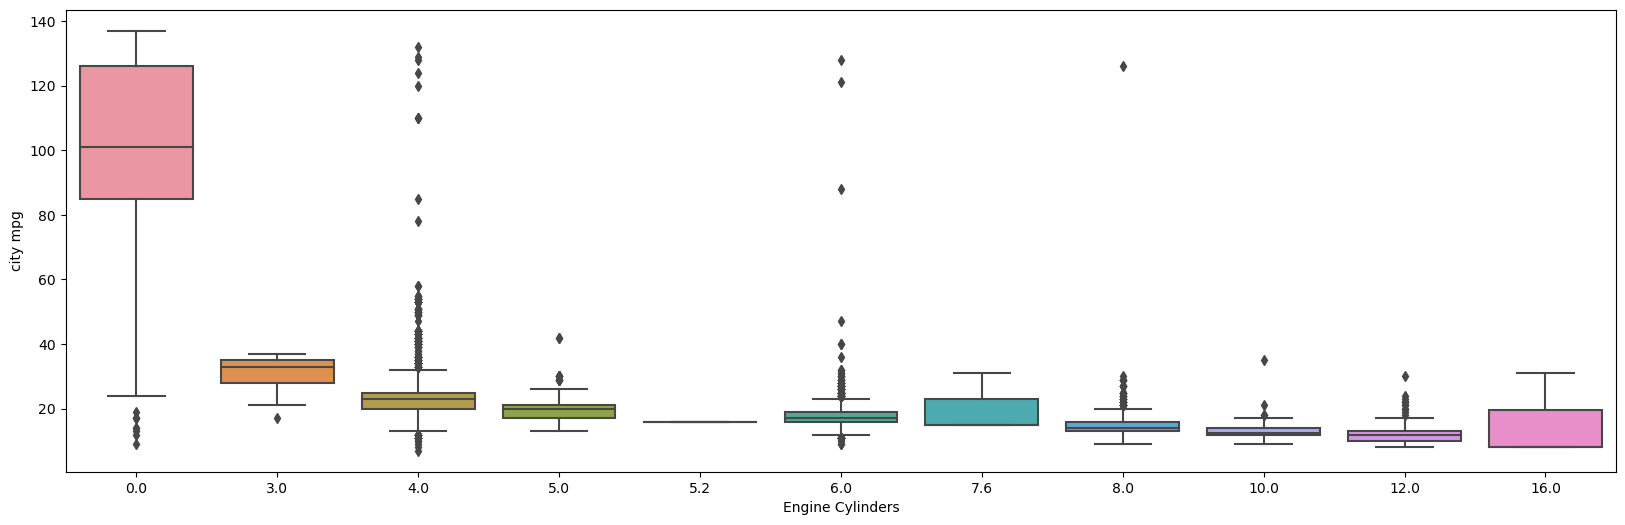

In [100]:
# Box plot of Engine cylinders and city MPG
plt.figure(figsize=(20,6))
b = sns.boxplot(data=dataframe_removednoise, x="Engine Cylinders",y='city mpg')


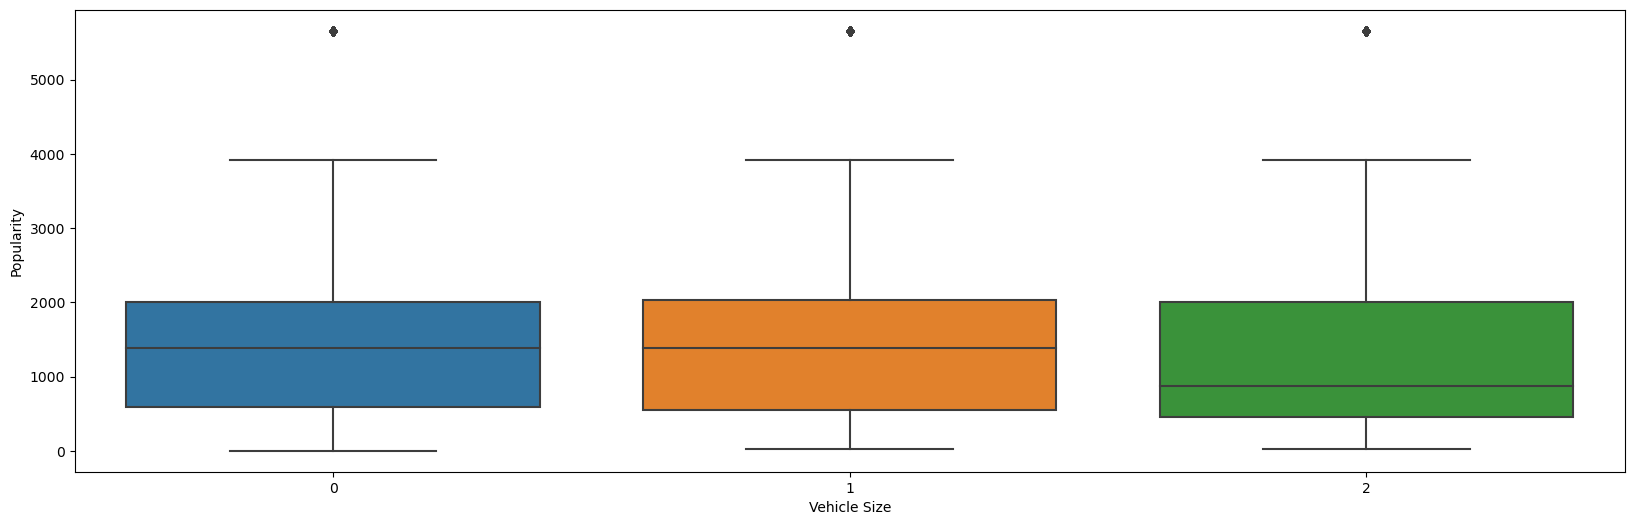

In [101]:
# Box plot of Vehicle Sizd and Popularity
plt.figure(figsize=(20,6))
b = sns.boxplot(data=dataframe_removednoise, x="Vehicle Size",y='Popularity')


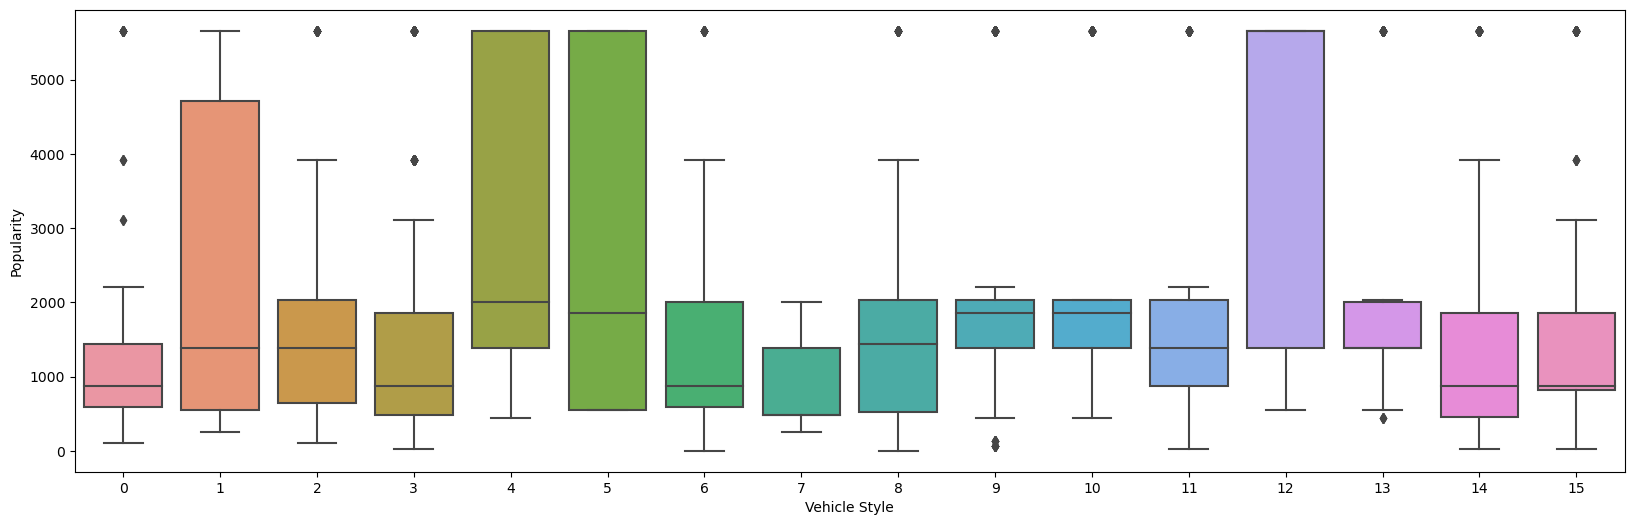

In [102]:

plt.figure(figsize=(20,6))
b = sns.boxplot(data=dataframe_removednoise, x="Vehicle Style",y='Popularity')

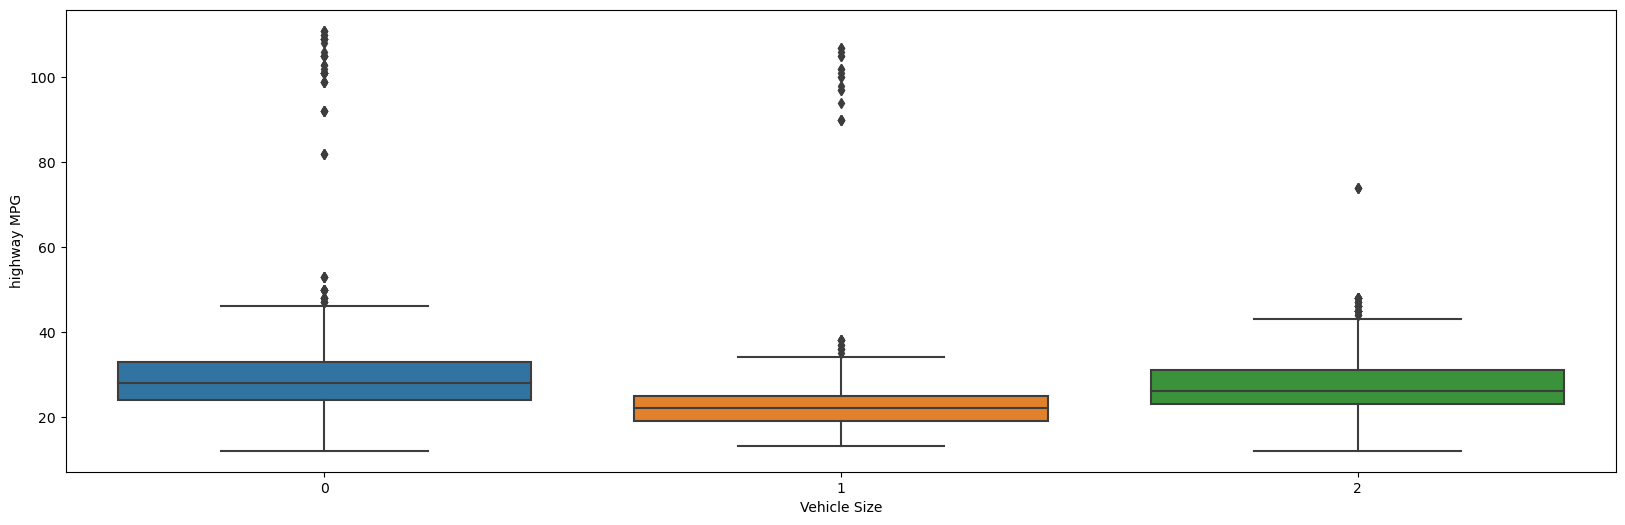

In [103]:
plt.figure(figsize=(20,6))
b = sns.boxplot(data=dataframe_removednoise, x="Vehicle Size",y='highway MPG')


In [105]:
categorical_columns = [column for column in dataframe.columns if dataframe[column].dtype == 'object']
categorical_columns

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [108]:
from ipywidgets import interact

In [106]:
import ipywidgets as widgets
dd = widgets.Dropdown(
                    options= categorical_columns,
value = categorical_columns[0], 
description='Select a column'
)

In [109]:
# Interative Graph with counts with respect to other attributes 
def draw_countplot(column):
    p = sns.countplot(data=dataframe, x=column)
    if len(dataframe[column].unique()) > 4:
        p.tick_params(axis='x',rotation=90)
interact(draw_countplot, column=dd)

interactive(children=(Dropdown(description='Select a column', options=('Make', 'Model', 'Engine Fuel Type', 'T…

<function __main__.draw_countplot(column)>

In [110]:
numeric_columnsss = [column for column in dataframe.columns if dataframe_removednoise[column].dtype == 'int64']

In [111]:
numeric_columnsss

['Year', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

In [112]:
categorical_columns

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [124]:
#One caregorical column and 2 Numerical column interative graph, Useful in finding dependability and correlations
dd1 = widgets.Dropdown(options= categorical_columns,description="Column1")
dd2 = widgets.Dropdown(options= numeric_columnsss,description="Column2")
dd3 = widgets.Dropdown(options= numeric_columnsss,description="Hue")
ui = widgets.HBox([dd1,dd2,dd3])
def draw_countplot(column1,column2, hue):
    p = sns.relplot(data=dataframe, x=column1,y=column2,hue=hue)
    p.tick_params(axis='x',rotation=90)
    p.savefig('relplt.jpg')
out = widgets.interactive_output(draw_countplot, {'column1':dd1,'column2':dd2,'hue':dd3})
display(ui,out)


Output()

In [149]:
#Using Numpy's Digitizer for Discretization of Engine HP column since the column has varying values but can be made into bins
dataframe_removednoise['Engine HP']

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11995    184.0
11996    295.0
11997    184.0
11998    300.0
11999    300.0
Name: Engine HP, Length: 11996, dtype: float64

In [150]:
min(dataframe_removednoise['Engine HP'])

55.0

In [151]:
max(dataframe_removednoise['Engine HP'])

1001.0

In [152]:
# Defining bins
import numpy as np
Horse_powe_digitised = np.digitize(dataframe_removednoise['Engine HP'], bins=[150,300,450,600,750,900,1150])

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Horse_powe_digitised', y='city mpg',data=dataframe_removednoise, ci=None)

In [153]:
dataframe_normalised = dataframe_removednoise

In [154]:
dataframe_normalised['Engine HP'] = Horse_powe_digitised

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\3705128358.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Engine HP', y='city mpg', data=dataframe_normalised, ci=None)


<AxesSubplot:xlabel='Engine HP', ylabel='city mpg'>

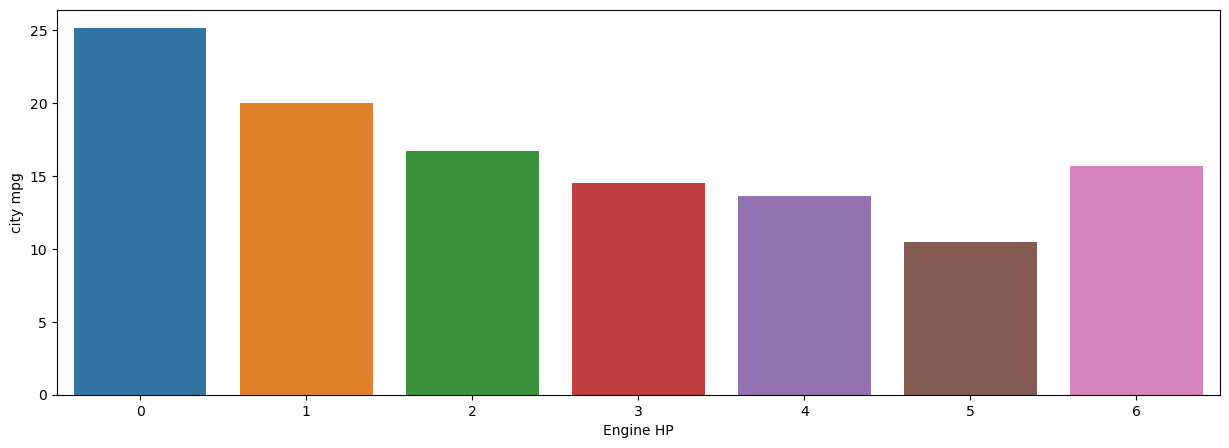

In [156]:
# Bar plot of Discretized Engine HP and city MPG
plt.figure(figsize=(15,5))
sns.barplot(x='Engine HP', y='city mpg', data=dataframe_normalised, ci=None)

C:\Users\Abhishek MR\AppData\Local\Temp\ipykernel_7572\2199922569.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Engine HP', y='highway MPG', data=dataframe_normalised, ci=None)


<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

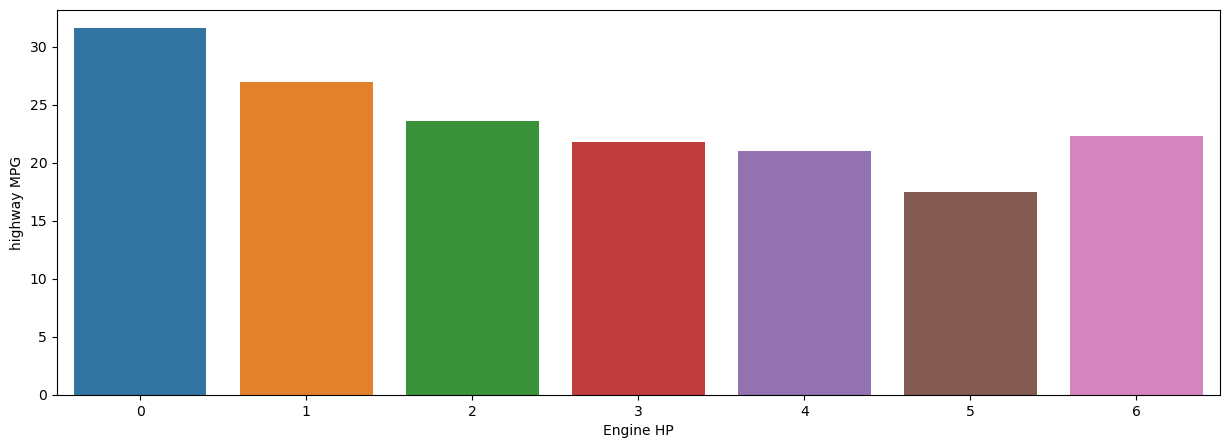

In [157]:
# Bar plot of Discretized Engine HP and highway MPG
plt.figure(figsize=(15,5))
sns.barplot(x='Engine HP', y='highway MPG', data=dataframe_normalised, ci=None)

<AxesSubplot:ylabel='city mpg'>

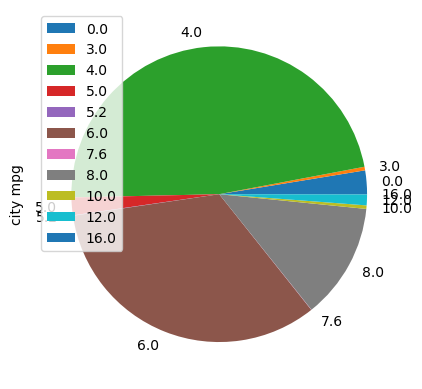

In [180]:
# Pie plot
#plot(kind='pie')
dataframe_normalised.groupby(['Engine Cylinders']).sum().plot(kind='pie', y='city mpg')

In [170]:
dataframe_removednoise

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,2,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,8,2,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,8,2,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,8,1,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,8,1,6.0,3,3,2.0,63,0,6,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,10,7,2017,4,1,4.0,1,2,4.0,41,2,14,36,23,1013,22490
11996,10,7,2017,4,1,6.0,1,2,4.0,41,2,14,36,23,1013,25690
11997,10,7,2017,4,1,4.0,1,0,4.0,48,2,14,28,18,1013,30900
11998,10,7,2017,4,2,6.0,1,2,4.0,41,2,14,36,23,1013,27795
